# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

In [2]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt


❓ Visualize the correlation between column pairs in a dataframe ❓

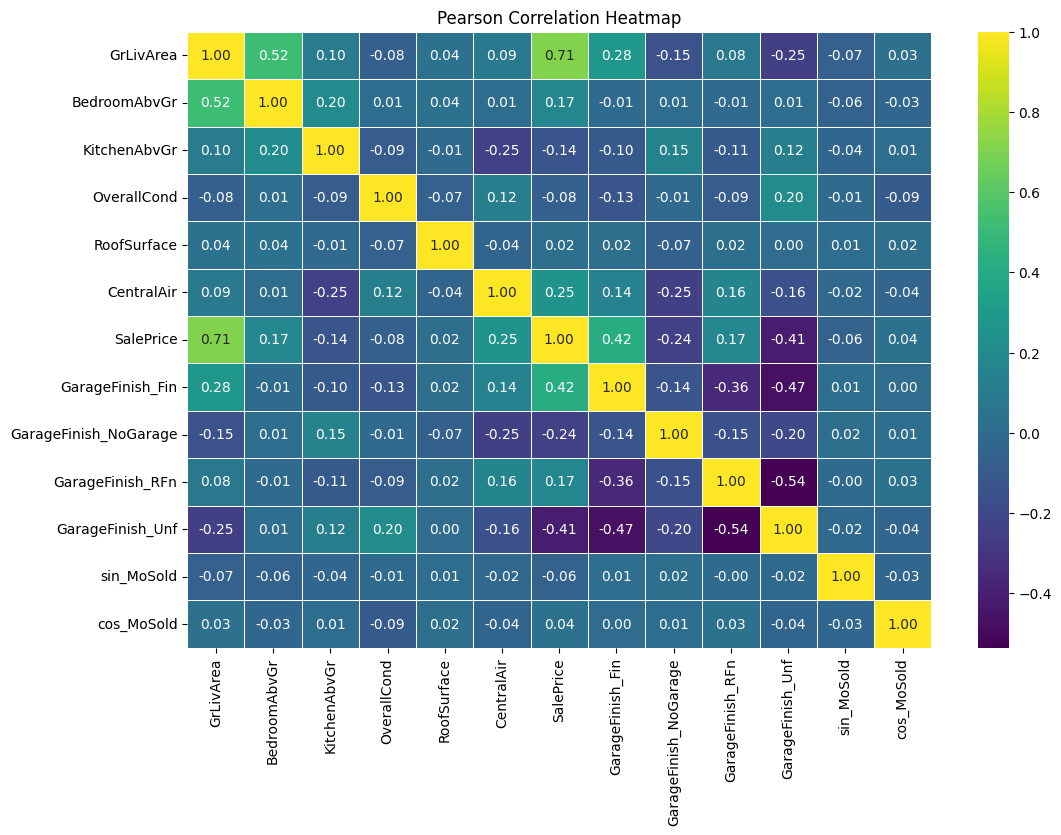

In [3]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [4]:
# YOUR CODE HERE
correlated_features = 0

🧪 **Test your code**

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



In [6]:
! git add tests/correlation.pickle

! git commit -m 'Completed correlation step'

! git push origin master

[master a5a8f29] Completed correlation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/correlation.pickle
Enumerating objects: 17, done.
Counting objects: 100% (17/17), done.
Delta compression using up to 4 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (17/17), 4.25 KiB | 1.42 MiB/s, done.
Total 17 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (5/5), done.
To github.com:juliensoudet/data-feature-selection.git
 * [new branch]      master -> master


## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [7]:
# YOUR CODE HERE
y = data['SalePrice']


❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

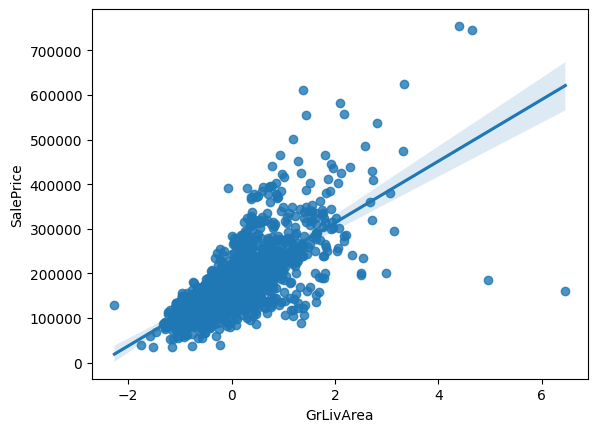

In [11]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = data)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [21]:
# YOUR CODE HERE
#X = data[['GrLivArea', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_NoGarage', ]]
X = data.drop(columns=['SalePrice'])

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5) 

base_model_score = cv_scores.mean()
base_model_score

0.641914406699805

🧪 **Test your code**

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



In [23]:
! git add tests/base_model.pickle

! git commit -m 'Completed base_model step'

! git push origin master


[master 7ee8ac5] Completed base_model step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/base_model.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 508 bytes | 254.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-feature-selection.git
   a5a8f29..7ee8ac5  master -> master


## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [28]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
base_r2 = r2_score(y_test, y_pred)
print("Base R^2 Score (without permutation):", base_r2)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

feature_names = X.columns
perm_importance_scores = perm_importance.importances_mean

perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance_scores})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Permutation Importance:")
print(perm_importance_df)

Base R^2 Score (without permutation): 0.6828988749620524

Feature Permutation Importance:
                  Feature  Importance
0               GrLivArea    0.874338
6        GarageFinish_Fin    0.062167
1            BedroomAbvGr    0.043267
9        GarageFinish_Unf    0.025114
2            KitchenAbvGr    0.018551
7   GarageFinish_NoGarage    0.013456
8        GarageFinish_RFn    0.009260
5              CentralAir    0.008142
10             sin_MoSold    0.000794
11             cos_MoSold    0.000159
3             OverallCond   -0.000082
4             RoofSurface   -0.000224


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [26]:
# YOUR CODE HERE
best_feature = "GrLivArea"


🧪 **Test your code**

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



In [29]:
! git add tests/feature_permutation.pickle

! git commit -m 'Completed feature_permutation step'

! git push origin master

[master 7cfc33a] Completed feature_permutation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/feature_permutation.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 458 bytes | 458.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-feature-selection.git
   7ee8ac5..7cfc33a  master -> master


## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [37]:
# YOUR CODE HERE
y = data['SalePrice']
X = data[['GrLivArea', 'GarageFinish_Fin', 'BedroomAbvGr', 'GarageFinish_Unf', 'KitchenAbvGr', 'GarageFinish_NoGarage', 'GarageFinish_RFn']]

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5)  

simplified_model_score = cv_scores.mean()
simplified_model_score


0.6358411857385498

🧪 **Test your code**

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.42s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



In [39]:
! git add tests/reduced_complexity_model.pickle

! git commit -m 'Completed reduced_complexity_model step'

! git push origin master

[master 49b0d1b] Completed reduced_complexity_model step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/reduced_complexity_model.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 556 bytes | 556.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-feature-selection.git
   7cfc33a..49b0d1b  master -> master


P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!